###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, G.F. Forsyth.

# Coding Assignment: Rocket

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [66]:
m_s = 50.0 #kg
g = 9.81 # m/sec^2
rho = 1.091 # kg/m^3
r = 0.5 #m
A = np.pi*r**2 # m^2
v_e = 325.0 #m/sec
C_d = 0.15 
m_po = 100.0 # kg, initial value

In [67]:
dt = 0.1 #s

In [68]:
def burn_rate(t):
    return -20.0 if t < 5.0 else 0.0

In [69]:
def mass(T):
    m = m_po
    for t in np.arange(0,T,dt):
        m = m + dt*burn_rate(t)
    return m

In [70]:
def rocket(X,t):
    h, v = X[0], X[1]
    m_tot = m_s + mass(t)
    return np.array([v, 
                     (-m_tot*g - burn_rate(t)*v_e - 0.5*rho*v*np.abs(v)*A*C_d)\
                     /m_tot])

In [71]:
def euler_integrate(f,z0,a,b,T,dx):
    z = z0
    Z = np.empty((len(T),len(z0)))
    for i, t in enumerate(T):
        Z[i,:] = z
        z = z + dx*f(z,t)
    return Z

In [75]:
Time = np.arange(0,40,dt)
Path = euler_integrate(rocket, np.array([0,0]), 0, 6, Time ,dt)

"Max velocity at 5.0 seconds 
and 524.693008656 altitude is 232.539897886 m/sec


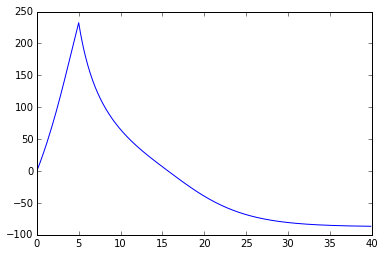

In [76]:
plt.plot(Time, Path.T[1])
print """"Max velocity at {t} seconds 
and {m} altitude is {vmax} m/sec""".format(t=Time[np.argmax(Path.T[1])],
                                     vmax=np.max(Path.T[1]),
                                     m = Path.T[0][np.argmax(Path.T[1])])

"Max altitude at 15.7 seconds 
and -0.168568488362 m/sec is 1336.6075068 meters
361
Impact at 36.1 seconds
and -85.6622132368 m/sec


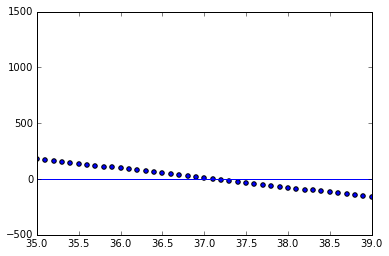

In [98]:
plt.scatter(Time, Path.T[0])
plt.plot(Time, np.zeros(Time.shape))
plt.axis([35,39,-500,1500])
print """"Max altitude at {t} seconds 
and {v} m/sec is {hmax} meters""".format(t=Time[np.argmax(Path.T[0])],
                                     hmax=np.max(Path.T[0]),
                                     v = Path.T[1][np.argmax(Path.T[0])])
print np.argmin(np.abs(Path[10:].T[0]))
print """Impact at {t} seconds
and {v} m/sec""".format(t = Time[np.argmin(np.abs(Path[10:].T[0]))],
                        v = Path.T[1][np.argmin(np.abs(Path[10:].T[0]))])

In [84]:
Time[360]

36.0

The equations of motion for a rocket in purely vertical flight are given by

\begin{align}
\frac{dh}{dt} &= v\\
(m_s+m_p) \frac{dv}{dt}& = -(m_s+m_p)g + \dot{m}_pv_e - \frac{1}{2}\rho v|v|AC_D
\end{align}

$h$ is the altitude of the rocket

$m_s = 50kg$ is the weight of the rocket shell

$g = 9.81 \frac{m}{s^2}$

$\rho = 1.091 \frac{kg}{m^3}$ is the average air density (assumed constant throughout flight)

$A = \pi r^2$ is the maximum cross sectional area of the rocket, where $r = 0.5 m$

$v_e = 325 \frac{m}{s}$ is the exhaust speed

$C_D = 0.15 $ is the drag coefficient

$m_{po} = 100 kg$ at time $t = 0$ is the initial weight of the rocket propellant

The mass of the remaining propellant is given by:

$$m_p = m_{po} - \int^t_0 \dot{m}_p d\tau$$

where $\dot{m}_p$ is the time-varying burn rate given by the following figure:

Propellant Burn Rate

![burn rate](./burn.rate.png)

Using Euler's method with a timestep of $\Delta t=0.1s$, create a Python script to calculate the altitude and velocity of the rocket from launch until crash down.  






##Assessment:

To check your answers, you can register for [MAE 6286: Practical Numerical Methods with Python](http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about).

1. At time $t=3.2s$, what is the mass (in kg) of rocket propellant remaining in the rocket?

2. What is the maximum speed of the rocket in $\frac{m}{s}$?
    At what time does this occur (in seconds)? 
    What is the altitude at this time (in meters)? 
    
3. What is the rocket's maximum altitude during flight (in meters)? At what time (in seconds) does this occur?

4. At what time (in seconds) does the rocket impact the ground? What is the velocity of the rocket (in $\frac{m}{s}$) at time of impact?

##Derivation of the rocket equations

In case you are kind of confused about the rocket equations, here we show how to get to them. 

We will start from the widely used [Reynolds' transport theorem](http://en.wikipedia.org/wiki/Reynolds_transport_theorem). For an extensive property $N$ in a volume $\Omega$, with corresponding intensive property $\eta = N/m$, the Reynolds' transport theorem reads

$$
\frac{DN}{Dt} =  \frac{\partial}{\partial t} \int_\Omega \eta \rho {\rm dV}  + \oint_{\partial \Omega} \eta \rho \mathbf{V} \cdot \mathbf{n} {\rm d} S
$$

where $m$ is mass, dV is an element of volume, $\mathbf{V}$ the velocity, $\mathbf{n}$ the unit normal vector pointing out of the control volume and $\rho$ density. We will use a control volume that encloses the rocket, and moves with it. If the velocity of the control volume is $\mathbf{V}_{\rm CV}$, we can write the velocity as $\mathbf{V} = \mathbf{V}_{\rm CV} + \mathbf{V}^\prime$, and the Reynolds' transport theorem becomes

$$
\frac{DN}{Dt} =  \frac{\partial}{\partial t} \int_\Omega \eta \rho {\rm dV}  + \oint_{\partial \Omega} \eta \rho \mathbf{V}_{\rm CV} \cdot \mathbf{n} {\rm d} S + \oint_{\partial \Omega} \eta \rho \mathbf{V}^\prime \cdot \mathbf{n} {\rm d} S.
$$

The second term in the right hand side of this equation can be rewritten using the divergence theorem

$$
\oint_{\partial \Omega} \eta \rho \mathbf{V}_{\rm CV} \cdot \mathbf{n} {\rm d} S = \int_{\Omega} \eta \rho \nabla \cdot \mathbf{V}_{\rm CV} {\rm dV},
$$

but for a non-deforming control volume, $\nabla \cdot \mathbf{V}_{\rm CV} = 0$, yielding

$$
\frac{DN}{Dt} =  \frac{\partial}{\partial t} \int_\Omega \eta \rho {\rm dV}  + \oint_{\partial \Omega} \eta \rho \mathbf{V}^\prime \cdot \mathbf{n} {\rm d} S.
$$  

Replacing $N = m \mathbf{V}^\prime$, we get the momentum conservation equation with a moving non-deforming control volume:

$$
\frac{D(m\mathbf{V}^\prime)}{Dt} =  \frac{\partial}{\partial t} \int_\Omega \mathbf{V}^\prime \rho {\rm dV}  + \oint_{\partial \Omega} \mathbf{V}^\prime \rho (\mathbf{V}^\prime \cdot \mathbf{n}) {\rm d} S.
$$  

For non-accelerating control volume, we can apply Newton's second law to compute the forces: 

$$
\frac{D(m\mathbf{V}^\prime)}{Dt} = \frac{D(m\mathbf{V})}{Dt} =  \frac{D\mathbf{p}}{Dt} = \sum \mathbf{F}.
$$ 

However, in this case the control volume is moving with the accelerating rocket, and we need to be a bit more careful. We can write $\frac{D(m\mathbf{V}^\prime)}{Dt} = \frac{D(m\mathbf{V})}{Dt} - \frac{D(m\mathbf{V}_{\rm CV})}{Dt}$, and considering the control volume is not deforming, $\frac{D(m\mathbf{V}_{\rm CV})}{Dt} = m\mathbf{a}_{\rm CV}$, where $\mathbf{a}_{\rm CV}$ is the acceleration of the control volume. On the other hand, $\mathbf{V}$ is taken from an inertial (non-accelerating) frame of reference, and Newton's second law is valid there, then

$$
\frac{D(m\mathbf{V}^\prime)}{Dt} = \frac{D(m\mathbf{V})}{Dt} - \frac{D(m\mathbf{V}_{\rm CV})}{Dt} = \sum \mathbf{F} - m \mathbf{a}_{\rm CV}.
$$

This way we get a momentum equation for an accelerating control volume:

$$
\sum \mathbf{F} - m \mathbf{a}_{\rm CV} =  \frac{\partial}{\partial t} \int_\Omega \mathbf{V}^\prime \rho {\rm dV}  + \oint_{\partial \Omega} \mathbf{V}^\prime \rho (\mathbf{V}^\prime \cdot \mathbf{n}) {\rm d} S.
$$

Let's examine this last equation to make it specific for the rocket problem. First, the rocket is subject to two forces: gravity and drag. This makes the sum of forces:

$$
\sum \mathbf{F} = (m_c + m_p) \mathbf{g} - \frac{1}{2} \rho_a \mathbf{v} |\mathbf{v}| A  C_D.
$$

where $\mathbf{v}$ is the velocity of the rocket, equal to the velocity of the control volume $\mathbf{V}_{\rm CV}$, and $\rho_a$ is the density of air.

Now, let's deal with the volume integral. Check out Figure 1: the control volume encloses the whole rocket, and the border is slightly away from the nozzle. We can make a cut on the control volume to analyze it in two parts: the top part consisting of the container only, and the bottom part from the nozzle down. The top part is a large container that moves with the control volume, and the relative velocities of the propellant inside are negligible. In the bottom part, the fluid is moving quite fast, but the amount of fluid there is constant in time. These two considerations allow us to drop the volume integral.

![Image](./figures/rocket_CV.png)
####Figure 1. Control volume of the rocket.

Done with the volume integral, now the surface integral. If we consider that the burnt propellant is coming out of the control volume with a constant velocity profile, we can rewrite the surface integral as

$$
\oint_{\partial \Omega} \mathbf{V}^\prime \rho_p (\mathbf{V}^\prime \cdot \mathbf{n}) {\rm d} S = \mathbf{V}^\prime \oint_{\partial \Omega} \rho_p (\mathbf{V}^\prime \cdot \mathbf{n}) {\rm d} S = \mathbf{V}^\prime \dot{m}_p = \mathbf{v}_e \dot{m}_p,
$$

where $\mathbf{v}_e$ is the exhaust velocity of the burnt propellant coming out of the nozzle with respect to the control volume, $\rho_p$ is the density of the propellant, and $\dot{m}_p$ is the mass flow rate of propellant. By saying that $\rho = \rho_p$ we are considering that the mass of air is negligible compared to the mass of propellant coming out of the nozzle.

Finally, the momentum equation for the rocket is

$$
(m_c + m_p) \mathbf{g} - \frac{1}{2} \rho_a \mathbf{v} |\mathbf{v}| A  C_D - (m_c + m_p)\frac{{\rm d} \mathbf{v}}{{\rm d}t} =  \mathbf{v}_e \dot{m}_p.
$$

In practical terms, we're only interested in the $y$ component. Vectors $\mathbf{g}$ and $\mathbf{v}_e$ are pointing down, which gives the scalar equation:

$$
-(m_c + m_p) g - \frac{1}{2} \rho_a v^2 A  C_D - (m_c + m_p)\frac{{\rm d} v}{{\rm d}t} =  -v_e \dot{m}_p.
$$

This is the equation you will work with for your assignment!


---

######The cell below loads the style of the notebook.

In [ ]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())